# Cotton Disease Prediction using Tranfer Learning

## 1.Business Problem
we have to classify the cotton plant <br>
There are four category of data <br>
1. Diseased Cotton Leaf
2. Diseased Cotton Plant
3. Fresh Cotton Leaf
4. Fresh Cotton Plant

In [1]:
cd drive/MyDrive/cotton\ disease\ data

/content/drive/MyDrive/cotton disease data


In [2]:
!ls

test  train  val


In [3]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPool2D,ZeroPadding2D,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
cd train/diseased\ cotton\ leaf

/content/drive/MyDrive/cotton disease data/train/diseased cotton leaf


In [5]:
import numpy as np
import cv2
img = cv2.imread('dis_leaf (141)_iaip.jpg')
print(img.shape)

(694, 694, 3)


In [6]:
cd ../../

/content/drive/MyDrive/cotton disease data


## reading the data from directory and splitting the data into train,test and validation 

In [7]:
img_width,img_height=100,100
channel=3

In [8]:
datagen=ImageDataGenerator(rescale=1/255)

In [9]:
train_data_genetator=datagen.flow_from_directory('train/',target_size=(img_width,img_height),
                                                 class_mode='categorical',color_mode="rgb",batch_size=16)

Found 1951 images belonging to 4 classes.


In [10]:
test_data_genetator=datagen.flow_from_directory('test/',target_size=(img_width,img_height),
                                                 class_mode='categorical',color_mode="rgb",batch_size=16)

Found 18 images belonging to 4 classes.


In [11]:
val_data_genetator=datagen.flow_from_directory('val/',target_size=(img_width,img_height),
                                                 class_mode='categorical',color_mode="rgb",batch_size=16)

Found 324 images belonging to 4 classes.


## Using transfer learning VGG16 model

In [12]:
from keras.applications.vgg16 import VGG16

In [13]:
model = VGG16(weights='imagenet',include_top=False,input_shape=(img_width,img_height,channel))

58892288/58889256 [==============================] - 3s 0us/step


In [14]:
for layer in model.layers[:4]:
  layer.trainable = False

In [15]:
from keras.models import Model
x = Flatten()(model.output)

prediction = Dense(4, activation='softmax')(x)

# create a model object
model = Model(inputs=model.input, outputs=prediction)

In [16]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [17]:
history=model.fit_generator(train_data_genetator,steps_per_epoch=len(train_data_genetator),epochs=20,validation_data=val_data_genetator,validation_steps=len(val_data_genetator))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
122/122 [==============================] - 1211s 10s/step - loss: 2.0688 - accuracy: 0.3843 - val_loss: 1.4617 - val_accuracy: 0.3117
Epoch 2/20
122/122 [==============================] - 16s 130ms/step - loss: 1.2191 - accuracy: 0.4593 - val_loss: 0.8746 - val_accuracy: 0.5648
Epoch 3/20
122/122 [==============================] - 16s 131ms/step - loss: 0.7948 - accuracy: 0.6575 - val_loss: 0.7627 - val_accuracy: 0.6265
Epoch 4/20
122/122 [==============================] - 16s 131ms/step - loss: 0.7588 - accuracy: 0.6594 - val_loss: 0.6961 - val_accuracy: 0.6728
Epoch 5/20
122/122 [==============================] - 16s 131ms/step - loss: 0.6767 - accuracy: 0.7458 - val_loss: 0.7341 - val_accuracy: 0.6975
Epoch 6/20
122/122 [==============================] - 16s 131ms/step - loss: 0.6103 - accuracy: 0.7704 - val_loss: 0.4964 - val_accuracy: 0.8179
Epoch 7/20
122/122 [==============================] - 16s 131ms/step - loss: 0.5453 - accuracy: 0.7759 - val_loss: 0.8684 - val_ac

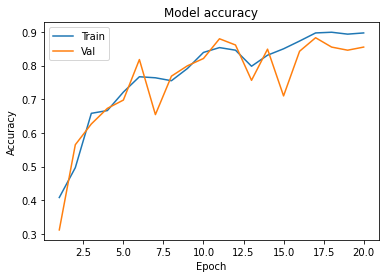

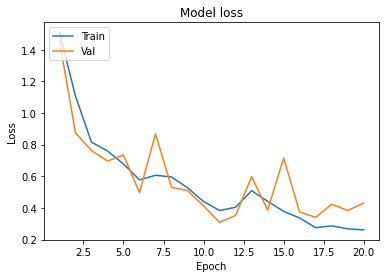

In [18]:
import matplotlib.pyplot as plt
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

plot_learningCurve(history, 20)